In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:

def gamma_correction(image_path, gamma=1.0):
    # Read the image 
    image = cv2.imread(image_path)

    # Normalize pixel values to the range [0, 1]
    image = image.astype('float') / 255.0
    
    # Apply gamma correction
    corrected_image = np.power(image, gamma)
    
    # Clip the values to ensure they are within the valid range [0, 1]
    corrected_image = np.clip(corrected_image, 0, 1)
    
    # Convert back to the range [0, 255] and return as uint8
    corrected_image = (corrected_image * 255).astype('uint8')
    
    # Extract directory and file name from the image path
    directory, filename = os.path.split(image_path)
    
    # Extract file name without extension
    name, ext = os.path.splitext(filename)
    
    # Construct the output path for the gamma-corrected image
    output_path = os.path.join(directory, f'{name}_gamma{gamma}{ext}')
    
    # Save the gamma-corrected image
    cv2.imwrite(output_path, corrected_image)
    
    return output_path


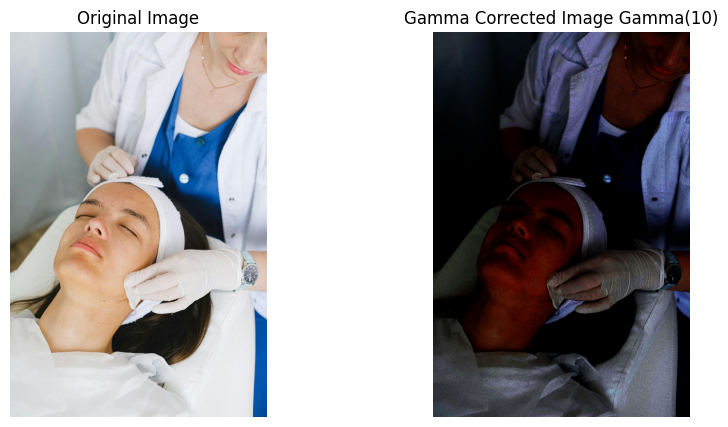

In [7]:
# Load an image
image_path = 'Images/doctor.png'

# Define the gamma value
_gamma = 10

# Apply gamma correction with a different gamma value:
gamma_corrected_image_path = gamma_correction(image_path, gamma=_gamma)
gamma_corrected_image = cv2.imread(gamma_corrected_image_path)

# Load the original image for display
original_image = cv2.imread(image_path)

# Display the original and gamma-corrected images:
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Gamma Corrected Image
plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected Image Gamma({_gamma})')
plt.imshow(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
